## KMeans

In [71]:
import sys
sys.path.insert(1, '/home/eatitall_scripts')
sys.path.insert(1, '/home/root/pctobs/lib/python3.8/site-packages')
import pandas as pd
from extraccion_informacion.clustering import clustering
from sklearn.metrics import silhouette_score



In [2]:
import numpy as np

In [3]:
csv_path='./../../archivos/datos_con_10_ejemplos_reglas_y_extraccion_entidades.csv'

In [4]:
# Cargamos el archivo CSV
df = pd.read_csv(csv_path)

In [5]:
# df_subsubconjunto=df[['edad','tg','estatina','tas','tad','fg',
#                     'diabetes_con_cv','diabetes_con_hipertension',
#                     'diabetes_con_lipidos','diabetes_con_estatinas','diabetes_mayores_de_65',
#                     'diabetes_mayores_de_65_y_salud_saludable','diabetes_mayores_de_65_y_salud_compleja',
#                     'diabetes_mayores_de_65_y_salud_muy_compleja']]

In [6]:
#Definimos parámetros KMeans
n_clusters=4
init='k-means++'
n_init = 10
max_iter=500
tol=0.0001
random_state= 111
algorithm='elkan'

In [7]:
df.head()

,Unnamed: 0,record_id,prevencion,sexo,f_nac,edad,f_dm,evoldm,cisq,ins_cardiaca,...,pc_prueba de funcion renal,pc_monitoreo continuo de glucosa (mcg),pc_prueba de pie diabetico,pc_electrocardiograma (ecg),pc_velocidad de sedimentacion globular (vsg),pc_prueba de tiroides,pc_hemograma completo,pc_prueba de vitamina b12,pc_prueba de vitamina d,pc_prueba de funcion hepatica
0,1,56,1.0,1,1952-01-20,71.0,2002-01-20,20.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,213,1.0,1,1960-06-08,63.0,2011-06-08,11.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,139-95,1.0,0,1947-09-24,75.0,2013-06-15,8.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,143-14,1.0,0,1985-05-31,37.0,2012-03-06,10.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,143-17,1.0,0,1966-12-10,56.0,2000-03-09,22.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import pandas as pd

# Ajustar la configuración de Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Puedes ajustar el ancho según sea necesario

# Suponiendo que 'df' es tu DataFrame
hay_nans = df.isnull().values.any()

if hay_nans:
    print("Hay valores NaN en el DataFrame.")
else:
    print("No hay valores NaN en el DataFrame.")

# Mostrar cuántos NaN hay por columna
nans_por_columna = df.isnull().sum()
print("\nNúmero de NaN por columna:")
print(nans_por_columna)



Hay valores NaN en el DataFrame.

Número de NaN por columna:
Unnamed: 0                       0
record_id                        0
prevencion                       0
sexo                             0
f_nac                            0
                                ..
pc_prueba de tiroides            0
pc_hemograma completo            0
pc_prueba de vitamina b12        0
pc_prueba de vitamina d          0
pc_prueba de funcion hepatica    0
Length: 6445, dtype: int64


In [9]:
import pandas as pd

# Ajustar la configuración de Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Puedes ajustar el ancho según sea necesario

# Suponiendo que 'df' es tu DataFrame

# Comprobar si hay valores NaN en el DataFrame y en qué columnas
hay_nans = df.isnull().values.any()

if hay_nans:
    print("Hay valores NaN en el DataFrame.")
    
    # Mostrar cuántos NaN hay por columna y listar las columnas que contienen NaN
    nans_por_columna = df.isnull().sum()
    print("\nNúmero de NaN por columna:")
    print(nans_por_columna[nans_por_columna > 0])  # Filtrar para mostrar solo las columnas con NaN
    
    # Identificar y listar explícitamente las columnas que tienen NaN
    columnas_con_nans = nans_por_columna[nans_por_columna > 0].index.tolist()
    print("\nColumnas que contienen NaNs:", columnas_con_nans)
else:
    print("No hay valores NaN en el DataFrame.")


Hay valores NaN en el DataFrame.

Número de NaN por columna:
ins_cardiaca         3
ldl                  1
tg                   1
cac                  4
inferior_cac         3
                    ..
hba1cpeso12mejor    10
HbA1c1257           10
HbA1c1265           10
HbA1c127            10
imc                  1
Length: 264, dtype: int64

Columnas que contienen NaNs: ['ins_cardiaca', 'ldl', 'tg', 'cac', 'inferior_cac', 'prot', 'plaquetas', 'got', 'gpt', 'fib4', 'talla', 'peso', 'tas', 'tad', 't_glp1', 't_insulina', 's_insulina', 't_isglt2', 't_hipolipemiante', 'o_hipolipemiante', 'c_hipolipemiante', 'c_tto_hipo', 'imci', 'isglt2_b', 'insulina_b', 'estatina_b', 'peso_3_6meses', 'f_visita_3_6meses', 's_tto_3_6meses', 'motivo_3_6meses', 'motivo_s_3_6meses', 'dosis_3_6meses', 'hba1c_3_6meses', 'cac_3_6meses', 'inferior_cac_3_6meses', 'prot_3_6meses', 'fg_3_6meses', 'supera_fg_3_6meses', 'ldl_3_6meses', 'tg_3_6meses', 'plaquetas_3_6meses', 'got_3_6meses', 'gpt_3_6meses', 'fib4_3_6meses', 'p

In [10]:
columnas_con_nans

['ins_cardiaca',
 'ldl',
 'tg',
 'cac',
 'inferior_cac',
 'prot',
 'plaquetas',
 'got',
 'gpt',
 'fib4',
 'talla',
 'peso',
 'tas',
 'tad',
 't_glp1',
 't_insulina',
 's_insulina',
 't_isglt2',
 't_hipolipemiante',
 'o_hipolipemiante',
 'c_hipolipemiante',
 'c_tto_hipo',
 'imci',
 'isglt2_b',
 'insulina_b',
 'estatina_b',
 'peso_3_6meses',
 'f_visita_3_6meses',
 's_tto_3_6meses',
 'motivo_3_6meses',
 'motivo_s_3_6meses',
 'dosis_3_6meses',
 'hba1c_3_6meses',
 'cac_3_6meses',
 'inferior_cac_3_6meses',
 'prot_3_6meses',
 'fg_3_6meses',
 'supera_fg_3_6meses',
 'ldl_3_6meses',
 'tg_3_6meses',
 'plaquetas_3_6meses',
 'got_3_6meses',
 'gpt_3_6meses',
 'fib4_3_6meses',
 'peso_s_3_6meses',
 'imc_3_6meses',
 'tas_3_6meses',
 'tad_3_6meses',
 's_insulina_3_6meses',
 'isglt2_s_3_6meses',
 'isglt2_a_3_6meses',
 'estatina_3_6meses',
 'c_hipo_3_6meses',
 'f_mace_d_3_6meses',
 'f_mare_d_3_6meses',
 'f_muerte_diferido_3_6meses',
 'e_adversos_a_3_6meses',
 'c_hba1c_3_6_meses',
 'c_peso_3_6_meses',
 'c_

# Convertir nans a 0s

In [11]:
import pandas as pd

# Si quieres modificar el DataFrame original en lugar de crear uno nuevo, puedes hacerlo de la siguiente manera:
df= df.fillna(-100)
# Ahora 'df' tiene todos los NaNs reemplazados por 0s


# Procesar strings

In [12]:
def listar_columnas_string(df):
    columnas_string = [col for col in df.columns if df[col].dtype == 'object']
    return columnas_string

In [13]:
listar_columnas_string(df)

['record_id',
 'f_nac',
 'f_dm',
 'f_inicio',
 'o_hipolipemiante',
 'f_visita_3_6meses',
 'motivo_s_3_6meses',
 'f_mace_d_3_6meses',
 'f_muerte_diferido_3_6meses',
 'observaciones']

### Eliminamos las fechas y las observaciones de los médicos

In [14]:
lista_columnas_a_eliminar=listar_columnas_string(df)
df=df.drop(lista_columnas_a_eliminar,axis=1)

## Clustering

In [15]:
maxClusters=5
inertia=clustering.inertia_of_kmeans(df,maxClusters,n_clusters=4,init='k-means++',n_init = 10,max_iter=500,tol=0.0001,random_state= 111,algorithm='elkan')

/home/root/pctobs/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:967: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(


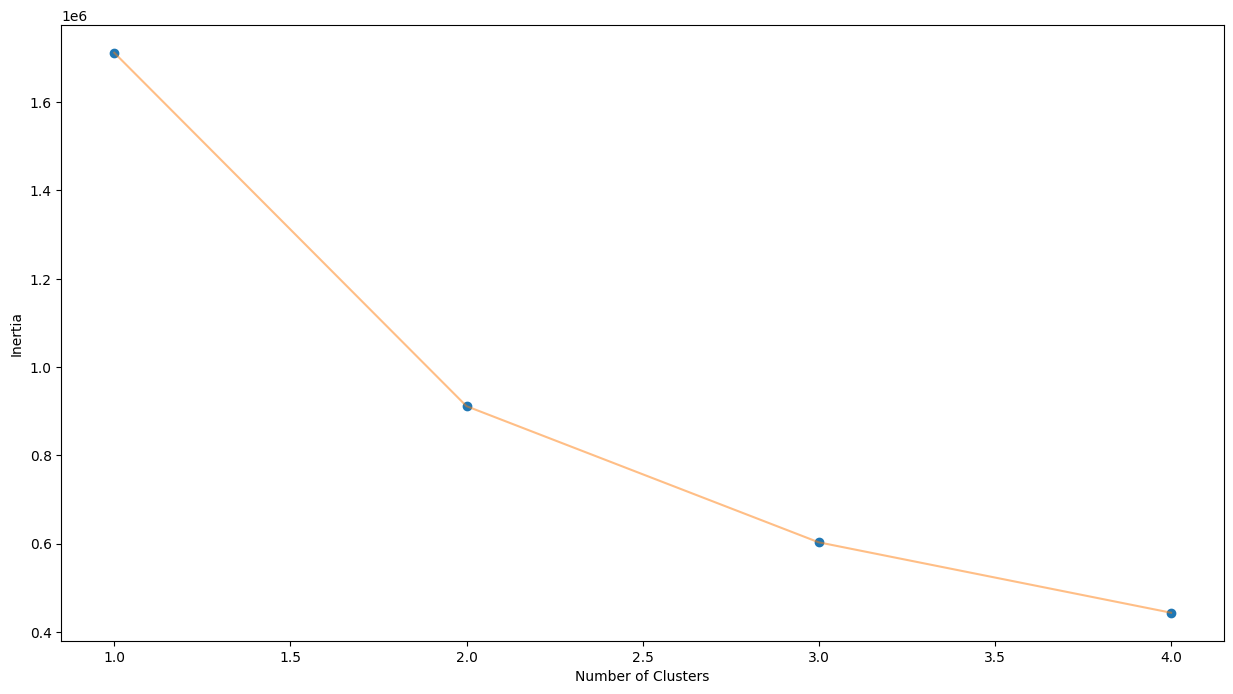

In [16]:
import matplotlib.pyplot as plt
# Crea una figura con un tamaño específico
plt.figure(1, figsize=(15, 8))  
# Gráfica de dispersión ('o') y línea ('-') para visualizar la relación entre k y la inercia
plt.plot(np.arange(1, 5), inertia, 'o')
plt.plot(np.arange(1, 5), inertia, '-', alpha=0.5)
# Etiqueta del eje x
plt.xlabel('Number of Clusters')
# Etiqueta del eje y
plt.ylabel('Inertia')
# Muestra el gráfico
plt.show()  

### Aplicamos el algoritmo de Clustering

In [17]:
from sklearn.cluster import KMeans

algorithm = (KMeans(n_clusters = 4,init='k-means++', n_init = 10 ,max_iter=500,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') ) 
## Aplica el algoritmo de k-means al conjunto de datos X1 para realizar el clustering. 
## Esto ajusta los centroides de los clústeres y asigna cada punto a un clúster.
algorithm.fit(df)
## Cada etiqueta indica a qué clúster pertenece el punto.
labels = algorithm.labels_
## Después de ajustar el modelo, esta línea guarda las coordenadas de los centroides de los clústeres en centroids1.
centroids = algorithm.cluster_centers_

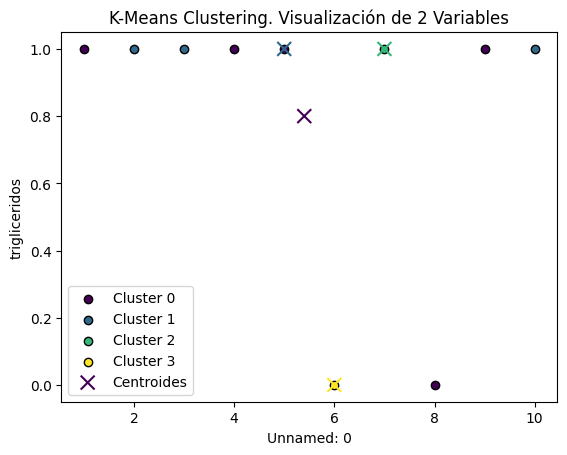

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# Supongamos que 'kmeans' es tu modelo K-Means entrenado
# y 'X' es tu conjunto de datos

# Elige las dos variables para visualizar
x_index = 0  # El índice de la primera variable en X
y_index = 1  # El índice de la segunda variable en X

# Crear un mapa de colores basado en las etiquetas de los clusters
colors = plt.cm.viridis(np.linspace(0, 1, len(centroids)))

# Gráfico de dispersión de los datos
for i, color in enumerate(colors):
    plt.scatter(df.loc[labels == i, df.columns[x_index]], 
                df.loc[labels == i, df.columns[y_index]], 
                color=color, marker='o', edgecolor='k', label=f'Cluster {i}')

# Gráfico de los centroides
plt.scatter(centroids[:, x_index], centroids[:, y_index], c=colors, marker='x', s=100, label='Centroides')
# Etiquetas y título
plt.xlabel(df.columns[x_index])
#plt.ylabel(df_subsubconjunto_con_reglas_sin_nulos_lite.columns[y_index])
plt.ylabel('trigliceridos')
plt.title('K-Means Clustering. Visualización de 2 Variables')
plt.legend()

# Mostrar el gráfico
plt.show()


In [74]:
score = silhouette_score(df,labels)
score

0.19803632312831412

In [19]:
labels

array([0, 1, 1, 0, 0, 3, 2, 0, 0, 1], dtype=int32)

In [20]:
data_reshaped

NameError: name 'data_reshaped' is not defined

In [ ]:
centroids

array([[5.4       , 0.8       , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [5.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [7.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [6.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Extraer las palabras que representan al centroide

In [35]:
#hay que saber los índices de las columnas 
# Encontrar los nombres de las columnas que comienzan con "al_"
def extraer_indices_de_columnas_con_prefijo(df,prefijo):
    columnas_con_prefijo = [col for col in df.columns if col.startswith(prefijo)]

    # Extraer los índices de estas columnas
    indices = [df.columns.get_loc(col) for col in columnas_con_prefijo]
    return indices

indices_al=extraer_indices_de_columnas_con_prefijo(df,'al_')
indices_far=extraer_indices_de_columnas_con_prefijo(df,'far_')
indices_sin=extraer_indices_de_columnas_con_prefijo(df,'sin_')
indices_pc=extraer_indices_de_columnas_con_prefijo(df,'pc_')
print("Índices de las columnas que comienzan con 'al_':", indices_al)
print("Índices de las columnas que comienzan con 'far_':", indices_far)
print("Índices de las columnas que comienzan con 'sin_':", indices_sin)
print("Índices de las columnas que comienzan con 'pc_':", indices_pc)

Índices de las columnas que comienzan con 'al_': [375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 

In [23]:
len(centroids[0])

6435

In [22]:
# alimentos_centroides=[]
# valor_alimentos_centroides=[]
# for i in range(0,len(centroids)):
#     alimentos_centroide_i=[]
#     valor_alimentos_centroide_i=[]
#     for k in range(0,len(centroids[i])):
#         if k>=indices_al[0] and k<=indices_al[-1]:
#             if centroids[i][k]!=0:
#                 alimentos_centroide_i.append(df.columns[k])
#                 valor_alimentos_centroide_i.append(centroids[i][k])
#     alimentos_centroides.append(alimentos_centroide_i)
#     valor_alimentos_centroides.append(valor_alimentos_centroide_i)

In [23]:
# Suponemos que 'centroids' es una lista de listas (o un array 2D) donde cada sublista representa un centroide
# y que 'indices_al' contiene los índices de las columnas que corresponden a los alimentos en el DataFrame 'df'

# Inicializar el diccionario para todos los centroides
centroides_dict = {}

for i in range(len(centroids)):
    # Crear un diccionario para los alimentos del centroide actual
    alimentos_dict = {}
    farmacos_dict={}
    sintomas_dict={}
    pruebas_clinicas_dict={}
    for k in range(len(centroids[i])):
        if indices_al[0] <= k <= indices_al[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                alimentos_dict[f"alimento{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
        if indices_far[0] <= k <= indices_far[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                farmacos_dict[f"farmaco{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
        if indices_sin[0] <= k <= indices_sin[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                sintomas_dict[f"farmaco{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
        if indices_pc[0] <= k <= indices_pc[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                pruebas_clinicas_dict[f"farmaco{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
    # Asignar el diccionario de alimentos al cluster correspondiente
    centroides_dict[f"cluster{i+1}"] = {"alimentos": alimentos_dict,"farmacos":farmacos_dict,"sintomas":sintomas_dict,"pruebas clinicas":pruebas_clinicas_dict}

# centroides_dict contiene ahora la estructura deseada


In [24]:
centroides_dict

{'cluster1': {'alimentos': {'alimento815': {'nombre': 'al_aceite de oliva',
    'frecuencia': 0.20000000000000004},
   'alimento840': {'nombre': 'al_avena', 'frecuencia': 0.20000000000000004},
   'alimento898': {'nombre': 'al_pan blanco',
    'frecuencia': 0.20000000000000004},
   'alimento930': {'nombre': 'al_quinoa', 'frecuencia': 0.20000000000000004},
   'alimento1051': {'nombre': 'al_aguacates',
    'frecuencia': 0.20000000000000004},
   'alimento1313': {'nombre': 'al_carbohidratos',
    'frecuencia': 0.19999999999999998},
   'alimento1316': {'nombre': 'al_azucares', 'frecuencia': 0.2},
   'alimento1317': {'nombre': 'al_carbohidratos complejos',
    'frecuencia': 0.20000000000000004},
   'alimento1320': {'nombre': 'al_grasas', 'frecuencia': 0.4000000000000001},
   'alimento1330': {'nombre': 'al_legumbres',
    'frecuencia': 0.20000000000000004},
   'alimento1332': {'nombre': 'al_frutos secos',
    'frecuencia': 0.20000000000000004},
   'alimento1346': {'nombre': 'al_snacks ricos en

In [76]:
def obtener_desvEst_distPromedio_distPromedioResto(variable,df,centroids,labels,indice_cluster_i):
    indices_df_cluster_i = np.where(labels == indice_cluster_i)[0]
    df_cluster_i=df.iloc[indices_df_cluster_i]
    variable_desv_est_cluster_i=np.std(np.array(df_cluster_i[variable].tolist()))
    indice_variable=df.columns.get_loc(variable)
    variable_dist_centroide=np.sqrt(((np.array(df_cluster_i[variable].tolist())-centroids[indice_cluster_i][indice_variable])**2).sum(axis=0))
    variable_distancia_promedio = np.mean(variable_dist_centroide)

    indices_df_cluster_resto_i = np.where(labels != i)[0]
    df_cluster_resto_i=df.iloc[indices_df_cluster_resto_i]
    variable_dist_centroide_resto=np.sqrt(((np.array(df_cluster_resto_i[variable].tolist())-centroids[i][indice_variable])**2).sum(axis=0))
    variable_distancia_resto_promedio = np.mean(variable_dist_centroide_resto)
    return variable_desv_est_cluster_i,variable_distancia_promedio,variable_distancia_resto_promedio

In [80]:
# V2 de centroids_dict
# Suponemos que 'centroids' es una lista de listas (o un array 2D) donde cada sublista representa un centroide
# y que 'indices_al' contiene los índices de las columnas que corresponden a los alimentos en el DataFrame 'df'

# Inicializar el diccionario para todos los centroides
centroides_dict = {}

for i in range(len(centroids)):
    # Crear un diccionario para los alimentos del centroide actual
    num_pacientes=np.sum(labels==i)
    indices_df_cluster_i = np.where(labels == i)[0]
    df_cluster_i=df.iloc[indices_df_cluster_i]

    # imc_desv_est_cluster_i=np.std(np.array(df_cluster_i["imc"].tolist()))
    # indice_imc=df.columns.get_loc("imc")
    # imc_dist_centroide=np.sqrt(((np.array(df_cluster_i["imc"].tolist())-centroids[i][indice_imc])**2).sum(axis=0))
    # imc_distancia_promedio = np.mean(imc_dist_centroide)
    
    # indices_df_cluster_resto_i = np.where(labels != i)[0]
    # df_cluster_resto_i=df.iloc[indices_df_cluster_resto_i]
    # imc_dist_centroide_resto=np.sqrt(((np.array(df_cluster_resto_i["imc"].tolist())-centroids[i][indice_imc])**2).sum(axis=0))
    # imc_distancia_resto_promedio = np.mean(imc_dist_centroide_resto)
    imc_desv_est_cluster_i,imc_distancia_promedio,imc_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("imc",df,centroids,labels,i)
    tas_desv_est_cluster_i,tas_distancia_promedio,tas_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("tas",df,centroids,labels,i)
    tad_desv_est_cluster_i,tad_distancia_promedio,tad_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("tad",df,centroids,labels,i)
    tg_desv_est_cluster_i,tg_distancia_promedio,tg_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("tg",df,centroids,labels,i)
    hba1c_desv_est_cluster_i,hba1c_distancia_promedio,hba1c_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("hba1c",df,centroids,labels,i)
    fg_desv_est_cluster_i,fg_distancia_promedio,fg_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("fg",df,centroids,labels,i)
    edad_desv_est_cluster_i,edad_distancia_promedio,edad_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("edad",df,centroids,labels,i)
    acv_desv_est_cluster_i,acv_distancia_promedio,acv_distancia_resto_promedio=obtener_desvEst_distPromedio_distPromedioResto("acv",df,centroids,labels,i)

    alimentos_dict = {}
    farmacos_dict={}
    sintomas_dict={}
    pruebas_clinicas_dict={}
    # imc_desv_est_cluster
    # imc_dist_centroide_cluster
    # imc_dist_centroide_resto
    for k in range(len(centroids[i])):
        if indices_al[0] <= k <= indices_al[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                alimentos_dict[f"alimento{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
        if indices_far[0] <= k <= indices_far[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                farmacos_dict[f"farmaco{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
        if indices_sin[0] <= k <= indices_sin[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                sintomas_dict[f"sintoma{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
        if indices_pc[0] <= k <= indices_pc[-1]:  # Verificar si el índice corresponde a un alimento
            if centroids[i][k] != 0:  # Considerar solo los alimentos con frecuencia no nula
                pruebas_clinicas_dict[f"prueba_clinica{k}"] = {"nombre": df.columns[k], "frecuencia": centroids[i][k]}
        if k==indice_imc:
            imc_value={"valor": centroids[i][k]}
        if k==df.columns.get_loc("tas"):
            tas_value={"valor": centroids[i][k]}
        if k==df.columns.get_loc("tad"):
            tad_value={"valor": centroids[i][k]}
        if k==df.columns.get_loc("tg"):
            tg_value={"valor": centroids[i][k]}
        if k==df.columns.get_loc("hba1c"):
            hba1c_value={"valor": centroids[i][k]}
        if k==df.columns.get_loc("fg"):
            fg_value={"valor": centroids[i][k]}
        if k==df.columns.get_loc("edad"):
            edad_value={"valor": centroids[i][k]}
        if k==df.columns.get_loc("acv"):
            acv_value={"valor": centroids[i][k]}
    # Asignar el diccionario de alimentos al cluster correspondiente
    centroides_dict[f"cluster{i}"] = {"nun. paceintes":num_pacientes,
                                        "imc":{"valor":imc_value,
                                                "desv_est":imc_desv_est_cluster_i,
                                                "dist promedio":imc_distancia_promedio,
                                                "dist promedio resto clusters":imc_distancia_resto_promedio,},
                                        "tas":{"valor":tas_value,
                                                "desv_est":tas_desv_est_cluster_i,
                                                "dist promedio":tas_distancia_promedio,
                                                "dist promedio resto clusters":tas_distancia_resto_promedio,},
                                        "tad":{"valor":tad_value,
                                                "desv_est":tad_desv_est_cluster_i,
                                                "dist promedio":tad_distancia_promedio,
                                                "dist promedio resto clusters":tad_distancia_resto_promedio,},
                                        "tg":{"valor":tg_value,
                                                "desv_est":tg_desv_est_cluster_i,
                                                "dist promedio":tg_distancia_promedio,
                                                "dist promedio resto clusters":tg_distancia_resto_promedio,},
                                        "hba1c":{"valor":hba1c_value,
                                                "desv_est":hba1c_desv_est_cluster_i,
                                                "dist promedio":hba1c_distancia_promedio,
                                                "dist promedio resto clusters":hba1c_distancia_resto_promedio,},
                                        "fg":{"valor":fg_value,
                                                "desv_est":fg_desv_est_cluster_i,
                                                "dist promedio":fg_distancia_promedio,
                                                "dist promedio resto clusters":fg_distancia_resto_promedio,},
                                        "edad":{"valor":edad_value,
                                                "desv_est":edad_desv_est_cluster_i,
                                                "dist promedio":edad_distancia_promedio,
                                                "dist promedio resto clusters":edad_distancia_resto_promedio,},
                                        "acv":{"valor":acv_value,
                                                "desv_est":acv_desv_est_cluster_i,
                                                "dist promedio":acv_distancia_promedio,
                                                "dist promedio resto clusters":acv_distancia_resto_promedio,},
                                        "alimentos": alimentos_dict,
                                        "farmacos":farmacos_dict,
                                        "sintomas":sintomas_dict,
                                        "pruebas clinicas":pruebas_clinicas_dict}

# centroides_dict contiene ahora la estructura deseada


In [81]:
centroides_dict


{'cluster0': {'nun. paceintes': 5,
  'imc': {'valor': {'valor': 30.35682048594131},
   'desv_est': 15.839613882923956,
   'dist promedio': 35.41845337956736,
   'dist promedio resto clusters': 19.803875126578518},
  'tas': {'valor': {'valor': 83.0},
   'desv_est': 68.52736679604726,
   'dist promedio': 153.23185047502363,
   'dist promedio resto clusters': 175.5135322418189},
  'tad': {'valor': {'valor': 55.400000000000006},
   'desv_est': 45.306070233468716,
   'dist promedio': 101.30745283541582,
   'dist promedio resto clusters': 115.4963202877044},
  'tg': {'valor': {'valor': 213.6},
   'desv_est': 29.574313178838153,
   'dist promedio': 66.13017465575,
   'dist promedio resto clusters': 260.09652054573894},
  'hba1c': {'valor': {'valor': 8.0},
   'desv_est': 1.4338758663147937,
   'dist promedio': 3.2062439083762797,
   'dist promedio resto clusters': 5.618718715152059},
  'fg': {'valor': {'valor': 70.4},
   'desv_est': 24.21239352067449,
   'dist promedio': 54.14055781020362,
   

In [60]:
df['imc'].toarray()

AttributeError: 'Series' object has no attribute 'toarray'

In [47]:
import numpy as np

# Supongamos que este es tu array
array = np.array([1, 2, 3, 4, 1, 1, 5, 6, 1])

# Encontrar los índices donde el valor es '1'
indices = np.where(array == 1)

indices

(array([0, 4, 5, 8]),)

## Clustering jerarquico

In [25]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [26]:
# Generar la matriz de enlace usando el método 'ward'
Z = linkage(df, method='ward')

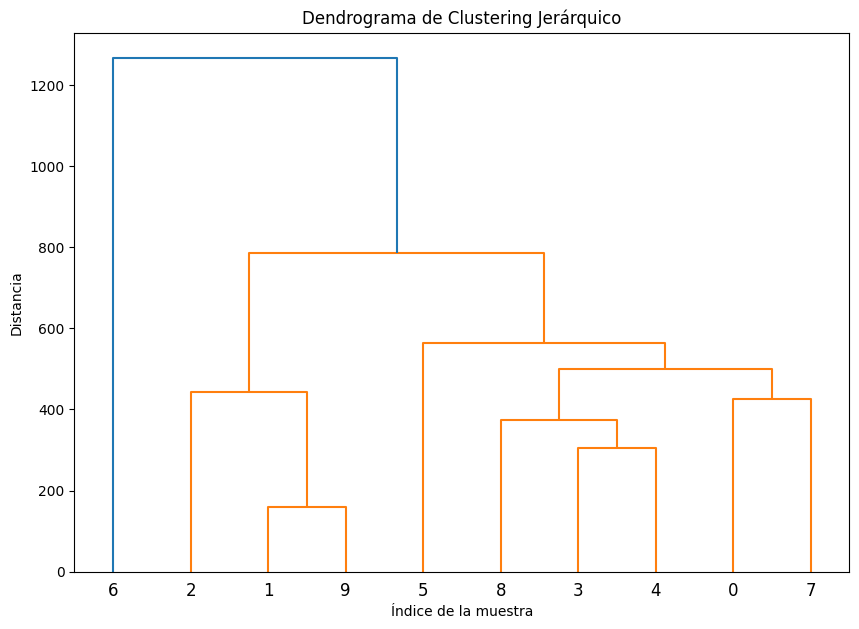

In [27]:
# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma de Clustering Jerárquico")
dendrogram(Z, labels=df.index)
plt.xlabel("Índice de la muestra")
plt.ylabel("Distancia")
plt.show()


In [28]:
Z

array([[1.00000000e+00, 9.00000000e+00, 1.60200621e+02, 2.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 3.04545627e+02, 2.00000000e+00],
       [8.00000000e+00, 1.10000000e+01, 3.73621920e+02, 3.00000000e+00],
       [0.00000000e+00, 7.00000000e+00, 4.26313574e+02, 2.00000000e+00],
       [2.00000000e+00, 1.00000000e+01, 4.43160152e+02, 3.00000000e+00],
       [1.20000000e+01, 1.30000000e+01, 5.00262259e+02, 5.00000000e+00],
       [5.00000000e+00, 1.50000000e+01, 5.64715292e+02, 6.00000000e+00],
       [1.40000000e+01, 1.60000000e+01, 7.85395712e+02, 9.00000000e+00],
       [6.00000000e+00, 1.70000000e+01, 1.26543889e+03, 1.00000000e+01]])

In [29]:
df.index

RangeIndex(start=0, stop=10, step=1)